In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats

plt.style.use('ggplot')

In [2]:
file_name = 'Python_project_eda.csv'

In [115]:
my_data = pd.read_csv(file_name)

In [28]:
my_data.head(10)

,buyer_week_before,clicked_buy_before,country,existing_buyer,initial_fop_set,made_purchase_before,saw_cart_before,spend_usd_next_14_days,user_added_credit_card,user_added_dcb,user_added_fop,user_added_gift_card,user_added_paypal,user_id,visit_before
0,0,0.0,IN,0,False,0.0,1.0,0.000000,0.0,0.0,0,0.0,0.0,18321316048201303366,1
1,0,0.0,IN,0,False,0.0,1.0,0.000000,0.0,0.0,0,0.0,0.0,13705367724816913241,1
2,0,0.0,IN,0,False,0.0,0.0,0.000000,0.0,0.0,0,0.0,0.0,6605724765451655114,0
3,0,1.0,CA,1,True,1.0,1.0,7.398815,1.0,0.0,1,0.0,0.0,2340067911948261502,1
4,7,1.0,PL,1,True,1.0,1.0,0.000000,0.0,1.0,1,0.0,0.0,11891045596810635427,1
5,0,0.0,ID,0,False,0.0,1.0,0.000000,0.0,0.0,0,0.0,0.0,16960375743361213328,1
6,0,1.0,TH,0,True,1.0,1.0,0.000000,0.0,1.0,1,0.0,0.0,14845700381773612658,1
7,0,0.0,ID,0,False,0.0,1.0,0.000000,0.0,0.0,0,0.0,0.0,1407472760358057975,1
8,0,0.0,NaN,0,False,0.0,1.0,0.000000,0.0,0.0,0,0.0,0.0,795175088989280187,1
9,0,0.0,GR,0,False,0.0,1.0,0.000000,0.0,0.0,0,0.0,0.0,6034351615620544692,1


In [5]:
my_data.shape

(566699, 15)

In [138]:
my_data.describe()

,buyer_week_before,clicked_buy_before,existing_buyer,made_purchase_before,saw_cart_before,spend_usd_next_14_days,user_added_credit_card,user_added_dcb,user_added_fop,user_added_gift_card,user_added_paypal,user_id,visit_before
count,566699.000000,566699.000000,566699.000000,566699.000000,566699.000000,566699.000000,566699.000000,566699.000000,566699.000000,566699.000000,566699.000000,5.666990e+05,566699.000000
mean,0.621745,0.225458,0.268135,0.184654,0.816589,10.653198,0.165135,0.144371,0.301036,0.055666,0.030085,9.222149e+18,0.874609
std,1.701956,0.417884,0.442989,0.388017,0.387004,88.375608,0.371303,0.351466,0.458709,0.229276,0.170821,5.319984e+18,0.331162
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.099261e+12,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.614402e+18,1.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.218982e+18,1.000000
75%,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.382236e+19,1.000000
max,8.000000,1.000000,1.000000,1.000000,1.000000,22519.570000,1.000000,1.000000,1.000000,1.000000,1.000000,1.844674e+19,1.000000


In [116]:
# deal with missing value
my_data['clicked_buy_before'] = my_data['clicked_buy_before'].fillna(0)
my_data['made_purchase_before'] = my_data['made_purchase_before'].fillna(0)
my_data['saw_cart_before'] = my_data['saw_cart_before'].fillna(0)
my_data['user_added_credit_card'] = my_data['user_added_credit_card'].fillna(0)
my_data['user_added_dcb'] = my_data['user_added_dcb'].fillna(0)
my_data['user_added_gift_card'] = my_data['user_added_gift_card'].fillna(0)
my_data['user_added_paypal'] = my_data['user_added_paypal'].fillna(0)
my_data['spend_usd_next_14_days'] = my_data['spend_usd_next_14_days'].fillna(0)

In [25]:
sum(pd.isnull(my_data['initial_fop_set']))

0

In [26]:
sum(pd.isnull(my_data['country']))

12524

In [136]:
my_data['spend_usd_next_14_days'].skew()

58.748328430996601

In [137]:
my_data['spend_usd_next_14_days'].quantile(0.95)

37.860539199999984

In [130]:
winsorized_data = my_data.copy()
winsorized_data['spend_usd_next_14_days'] = stats.mstats.winsorize(winsorized_data['spend_usd_next_14_days'], limits=0.05)

In [131]:
winsorized_data['spend_usd_next_14_days'].skew()

3.13487821886467

In [133]:
winsorized_data.describe()

,buyer_week_before,clicked_buy_before,existing_buyer,made_purchase_before,saw_cart_before,spend_usd_next_14_days,user_added_credit_card,user_added_dcb,user_added_fop,user_added_gift_card,user_added_paypal,user_id,visit_before
count,566699.000000,566699.000000,566699.000000,566699.000000,566699.000000,566699.000000,566699.000000,566699.000000,566699.000000,566699.000000,566699.000000,5.666990e+05,566699.000000
mean,0.621745,0.225458,0.268135,0.184654,0.816589,3.073348,0.165135,0.144371,0.301036,0.055666,0.030085,9.222149e+18,0.874609
std,1.701956,0.417884,0.442989,0.388017,0.387004,9.246692,0.371303,0.351466,0.458709,0.229276,0.170821,5.319984e+18,0.331162
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.099261e+12,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.614402e+18,1.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.218982e+18,1.000000
75%,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.382236e+19,1.000000
max,8.000000,1.000000,1.000000,1.000000,1.000000,37.861378,1.000000,1.000000,1.000000,1.000000,1.000000,1.844674e+19,1.000000


### Find correlation

In [142]:
my_data.head()

,buyer_week_before,clicked_buy_before,country,existing_buyer,initial_fop_set,made_purchase_before,saw_cart_before,spend_usd_next_14_days,user_added_credit_card,user_added_dcb,user_added_fop,user_added_gift_card,user_added_paypal,user_id,visit_before,if_spend_next_14_days
0,0,0.0,IN,0,False,0.0,1.0,0.000000,0.0,0.0,0,0.0,0.0,18321316048201303366,1,0
1,0,0.0,IN,0,False,0.0,1.0,0.000000,0.0,0.0,0,0.0,0.0,13705367724816913241,1,0
2,0,0.0,IN,0,False,0.0,0.0,0.000000,0.0,0.0,0,0.0,0.0,6605724765451655114,0,0
3,0,1.0,CA,1,True,1.0,1.0,7.398815,1.0,0.0,1,0.0,0.0,2340067911948261502,1,1
4,7,1.0,PL,1,True,1.0,1.0,0.000000,0.0,1.0,1,0.0,0.0,11891045596810635427,1,0


/Users/zhangtianqi/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


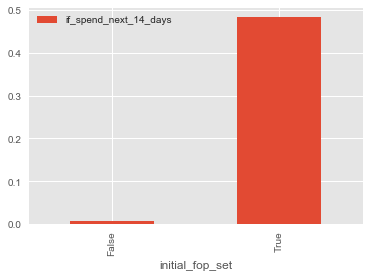

In [159]:
# correlation between payment and conversion rate
my_data['if_spend_next_14_days'] = 0
my_data['if_spend_next_14_days'][my_data.spend_usd_next_14_days>0] = 1
my_data.groupby('initial_fop_set')[['if_spend_next_14_days']].mean().plot.bar()


In [204]:
payment = dict()

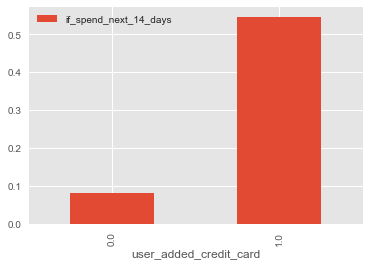

In [169]:
my_data.groupby('user_added_credit_card')[['if_spend_next_14_days']].mean().plot.bar()


In [205]:
df_payment = my_data.groupby('user_added_credit_card')[['if_spend_next_14_days']].mean().reset_index()
payment['credit_card'] = [df_payment['if_spend_next_14_days'].max()]


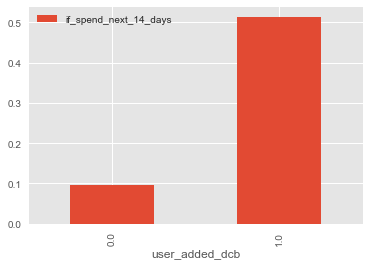

In [170]:
my_data.groupby('user_added_dcb')[['if_spend_next_14_days']].mean().plot.bar()

In [206]:
df_payment = my_data.groupby('user_added_dcb')[['if_spend_next_14_days']].mean().reset_index()
payment['direct_carrier_billing'] = [df_payment['if_spend_next_14_days'].max()]


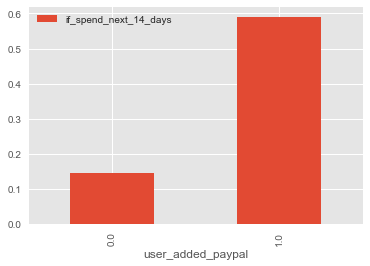

In [172]:
my_data.groupby('user_added_paypal')[['if_spend_next_14_days']].mean().plot.bar()

In [207]:
df_payment = my_data.groupby('user_added_paypal')[['if_spend_next_14_days']].mean().reset_index()
payment['paypal'] = [df_payment['if_spend_next_14_days'].max()]


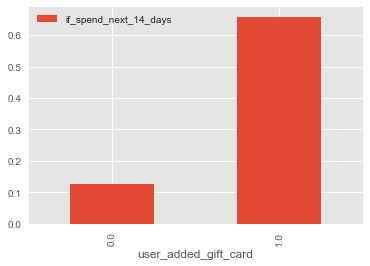

In [175]:
my_data.groupby('user_added_gift_card')[['if_spend_next_14_days']].mean().plot.bar()

In [208]:
df_payment = my_data.groupby('user_added_gift_card')[['if_spend_next_14_days']].mean().reset_index()
payment['giftcard'] = [df_payment['if_spend_next_14_days'].max()]


In [241]:
my_data['if_spend_next_14_days'][my_data.user_added_credit_card + my_data.user_added_dcb + my_data.user_added_paypal +
                                 my_data.user_added_gift_card >1].mean()

0.720024681019855

In [232]:
df_payment = pd.DataFrame(payment)
fop=df_payment.columns
conversion_rate = df_payment.values[0]
conversion_rate

array([ 0.54615204,  0.5137322 ,  0.658467  ,  0.59076779])

In [233]:
df_fop = pd.DataFrame({'fop': fop,
                        'conversion_rate': conversion_rate})

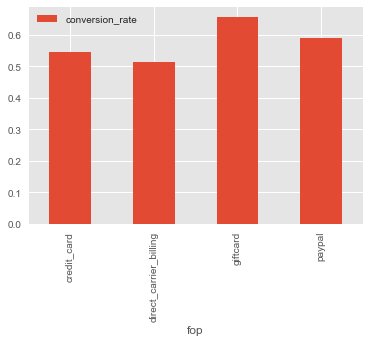

In [235]:
df_fop.set_index('fop').plot.bar()

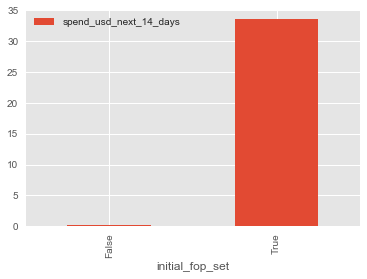

In [163]:
my_data.groupby('initial_fop_set')[['spend_usd_next_14_days']].mean().plot.bar()

In [155]:
my_data.groupby('visit_before')[['if_spend_next_14_days']].mean().reset_index()

,visit_before,if_spend_next_14_days
0,0,0.053561
1,1,0.171951


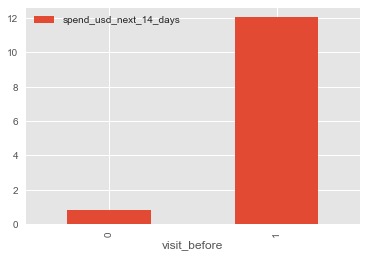

In [153]:
my_data.groupby('visit_before')[['spend_usd_next_14_days']].mean().plot.bar()

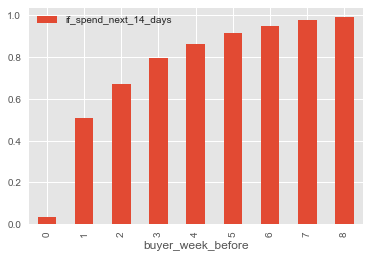

In [150]:
my_data.groupby('buyer_week_before')[['if_spend_next_14_days']].mean().plot.bar()

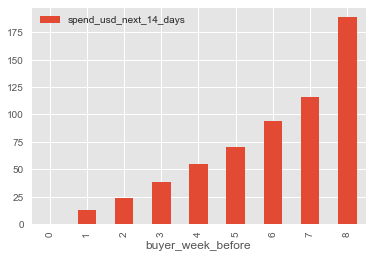

In [151]:
my_data.groupby('buyer_week_before')[['spend_usd_next_14_days']].mean().plot.bar()

In [ ]:
my_data.groupby('buyer_week_before')[['if_spend_next_14_days']].mean().plot.bar()